# Python Lab 6 - Group 9
## Mohammad Reza Safavi 98106701
## Amir Hossein  Golshirazi 98102187
## Mehran Mazaheri 98102346

## 1.Object Oriented Programming

### define class Set

In [1]:
class Set:
    def __init__(self):
        self.members = []

    def add(self, x):
        if x not in self.members:
            self.members.append(x)

    def delete(self, x):
        if x in self.members:
            self.members.remove(x)

    def __and__(self, other):
        temp = Set()
        for x in self.members:
            if x in other.members:
                temp.add(x)
        return temp

    def __or__(self, other):
        temp = Set()
        temp.members = self.members.copy()
        for x in other.members:
            temp.add(x)
        return temp

    def __eq__(self, other):
        return self.members == other.members

### Functionality Check

In [2]:
a = Set()
b = Set()
a.add(3)
b.add("4")
a.add("3")
a.add(3)
b.add(5)
a.add(5)
a.add(5)
print("a members are:", end="")
print(a.members)
print("b members are:", end="")
print(b.members)
print("(a&b) members are:", end="")
print((a&b).members)
print("(a|b) members are:", end="")
print((a|b).members)
print("a == b? ", end="")
print(a == b)
a.delete(3)
print("a members after member deletion are:", end="")
print(a.members)

a members are:[3, '3', 5]
b members are:['4', 5]
(a&b) members are:[5]
(a|b) members are:[3, '3', 5, '4']
a == b? False
a members after member deletion are:['3', 5]


## 2.Pandas

In [3]:
import pandas as pd
import numpy as np

### print dataframe

In [4]:
indexes = [1, 2, 3, 4, 5, 6]
columns = ['A', 'B', 'C', 'D']
df = pd.DataFrame(data=np.random.rand(6,4), columns=columns, index=indexes)
print(df)

          A         B         C         D
1  0.560820  0.971792  0.856193  0.089944
2  0.342301  0.643716  0.856168  0.774514
3  0.605562  0.482676  0.784484  0.447043
4  0.879824  0.595028  0.681473  0.425563
5  0.793584  0.821996  0.919672  0.185603
6  0.126586  0.565663  0.402491  0.136111


### print first 2-rows

In [ ]:
print(df.head(2))

### print last 2-rows

In [ ]:
print(df.tail(2))

### df.values
this command returns all values of dataframe as ndarray

In [5]:
df.values

array([[0.56081977, 0.97179217, 0.85619304, 0.08994437],
       [0.34230058, 0.64371564, 0.85616756, 0.77451403],
       [0.60556213, 0.48267598, 0.7844843 , 0.44704281],
       [0.87982407, 0.59502839, 0.68147293, 0.42556254],
       [0.7935835 , 0.8219961 , 0.91967163, 0.18560312],
       [0.12658578, 0.56566276, 0.4024913 , 0.13611117]])

### df.columns
this command returns the column labels of the DataFrame.

In [6]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

### df.index
returns row labels of the DataFrame

In [7]:
df.index

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')

### df.describe
the output of this command include those that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

In [9]:
df.describe

<bound method NDFrame.describe of           A         B         C         D
1  0.560820  0.971792  0.856193  0.089944
2  0.342301  0.643716  0.856168  0.774514
3  0.605562  0.482676  0.784484  0.447043
4  0.879824  0.595028  0.681473  0.425563
5  0.793584  0.821996  0.919672  0.185603
6  0.126586  0.565663  0.402491  0.136111>

### 2.3 sorting DataFrame

In [10]:
df.sort_values(by=['B','C'], ascending=[False, True],inplace=True)
df

,A,B,C,D
1,0.560820,0.971792,0.856193,0.089944
5,0.793584,0.821996,0.919672,0.185603
2,0.342301,0.643716,0.856168,0.774514
4,0.879824,0.595028,0.681473,0.425563
6,0.126586,0.565663,0.402491,0.136111
3,0.605562,0.482676,0.784484,0.447043


### add series to DataFrame

In [11]:
S = pd.Series(data=[1, 2, 3, 4, 5, 6])
df['F'] = S.values
df

,A,B,C,D,F
1,0.560820,0.971792,0.856193,0.089944,1
5,0.793584,0.821996,0.919672,0.185603,2
2,0.342301,0.643716,0.856168,0.774514,3
4,0.879824,0.595028,0.681473,0.425563,4
6,0.126586,0.565663,0.402491,0.136111,5
3,0.605562,0.482676,0.784484,0.447043,6


### replace determined value with NaN using df.iat

In [12]:
df.iat[2, 4] = np.nan
df.iat[4, 4] = np.nan
# df.at[3, 'F'] = np.nan
# df.at[5, 'F'] = np.nan
df

,A,B,C,D,F
1,0.560820,0.971792,0.856193,0.089944,1.0
5,0.793584,0.821996,0.919672,0.185603,2.0
2,0.342301,0.643716,0.856168,0.774514,NaN
4,0.879824,0.595028,0.681473,0.425563,4.0
6,0.126586,0.565663,0.402491,0.136111,NaN
3,0.605562,0.482676,0.784484,0.447043,6.0


### Access a group of rows and columns

In [13]:
df.loc[[1, 2, 3], ['A', 'F']]
# df.iloc[[0,1,2], [0,4]]

,A,F
1,0.560820,1.0
2,0.342301,NaN
3,0.605562,6.0


### Remove missing values using dropna

In [14]:
df1 = df.dropna(inplace=False)
df1

,A,B,C,D,F
1,0.560820,0.971792,0.856193,0.089944,1.0
5,0.793584,0.821996,0.919672,0.185603,2.0
4,0.879824,0.595028,0.681473,0.425563,4.0
3,0.605562,0.482676,0.784484,0.447043,6.0


### fill missing values using fillna

In [16]:
df2 = df.fillna(np.average(df.loc[:,"F"].dropna(inplace=False)),inplace=False)
df2

,A,B,C,D,F
1,0.560820,0.971792,0.856193,0.089944,1.00
5,0.793584,0.821996,0.919672,0.185603,2.00
2,0.342301,0.643716,0.856168,0.774514,3.25
4,0.879824,0.595028,0.681473,0.425563,4.00
6,0.126586,0.565663,0.402491,0.136111,3.25
3,0.605562,0.482676,0.784484,0.447043,6.00


## 3.matplotlib

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

### load DataFrame

In [18]:
df = pd.read_csv("train.csv")

### plot histogram

Text(0.5, 0, 'Applicant Income')

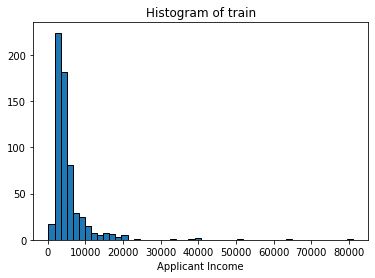

In [19]:
plt.hist(df['ApplicantIncome'],edgecolor='black', bins=50)
plt.title('Histogram of train')
plt.xlabel("Applicant Income")

### plot boxplot

Text(0, 0.5, 'Applicant Income')

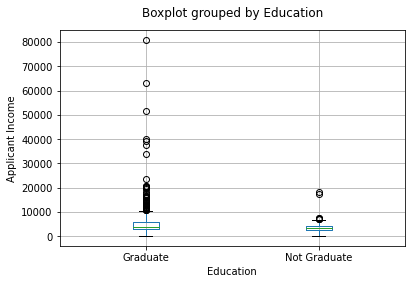

In [20]:
df.boxplot(column='ApplicantIncome', by='Education')
plt.title("")
plt.ylabel('Applicant Income')

### subplot dataframe plots

Text(0.5, 0, 'Credit_History')

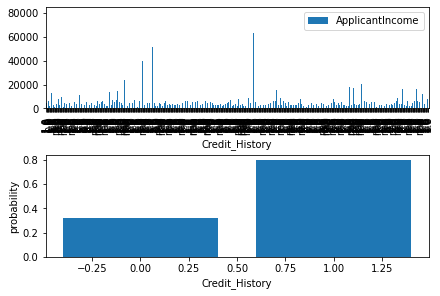

In [21]:
df['Loan_Status'].replace(['N', 'Y'], [0, 1], inplace=True)
c1, c1_l, c0, c0_l = [0, 0, 0, 0]
for index, row in df.iterrows():
    if row['Credit_History'] == 1:
        c1 += 1
        c1_l += row['Loan_Status']
    else:
        c0 += 1
        c0_l += row['Loan_Status']
fig1 = plt.figure(constrained_layout=True)
axs = fig1.subplots(2)
df.plot.bar(x='Credit_History',y='ApplicantIncome', ax=axs[0])
axs[1].bar(x=[0,1], height=[c0_l/c0, c1_l/c1],)
axs[1].set_ylabel("probability")
axs[1].set_xlabel('Credit_History')

## 4.Numpy & Scipy

In [22]:
import numpy as np
from scipy.fft import fft
from scipy.special import sinc
import matplotlib.pyplot as plt

### 4.1 np.arange, reshape, concatinate

In [23]:
X = np.arange(stop=6)
X = np.reshape(X,[3,2])
Y = np.random.randint(low=0, high=100, size=(3, 3))
Z = np.concatenate((X,Y), axis=1)
Z

array([[ 0,  1, 86, 59, 43],
       [ 2,  3, 96, 54, 13],
       [ 4,  5, 66, 59, 70]])

### flatten ndarray

In [24]:
np.ravel(Z)

array([ 0,  1, 86, 59, 43,  2,  3, 96, 54, 13,  4,  5, 66, 59, 70])

### indices of the maximum values

In [25]:
np.argmax(Z)

7

### 4.2 matrix definition

In [26]:
A = np.mat([[3,1,4],[1,5,9],[2,6,5]])
b = np.mat( [2,4,-1])
A

matrix([[3, 1, 4],
        [1, 5, 9],
        [2, 6, 5]])

In [27]:
b

matrix([[ 2,  4, -1]])

### calculate transpose

In [144]:
A.T

matrix([[3, 1, 2],
        [1, 5, 6],
        [4, 9, 5]])

### calculate inverse of matrix

In [28]:
np.linalg.inv(A)

matrix([[ 0.32222222, -0.21111111,  0.12222222],
        [-0.14444444, -0.07777778,  0.25555556],
        [ 0.04444444,  0.17777778, -0.15555556]])

### calculate determinant of matrix

In [29]:
np.linalg.det(A)

-90.0

### calculate eigen values and eigen vectors of matrix

In [30]:
np.linalg.eig(A)

(array([13.08576474,  2.58000566, -2.66577041]),
 matrix([[-0.31542644, -0.95117074, -0.32372474],
         [-0.72306109,  0.30781323, -0.70222933],
         [-0.61456393,  0.02291827,  0.63409484]]))

### calculate SVD decomposition of matrix

In [31]:
np.linalg.svd(A)

(matrix([[-0.32463251,  0.79898436,  0.50619929],
         [-0.75307473,  0.1054674 , -0.64942672],
         [-0.57226932, -0.59203093,  0.56745679]]),
 array([13.58235799,  2.84547726,  2.32869289]),
 matrix([[-0.21141476, -0.55392606, -0.80527617],
         [ 0.46331722, -0.78224635,  0.41644663],
         [ 0.86060499,  0.28505536, -0.42202191]]))

### calculate QR decomposition of matrix

In [32]:
np.linalg.qr(A)

(matrix([[-0.80178373,  0.56829114, -0.18490007],
         [-0.26726124, -0.61770776, -0.73960026],
         [-0.53452248, -0.54358283,  0.64715023]]),
 matrix([[-3.74165739, -5.34522484, -8.2850985 ],
         [ 0.        , -5.78174467, -6.00411946],
         [ 0.        ,  0.        , -4.16025147]]))

### solve equation AX = b.T

In [33]:
np.linalg.solve(A,b=b.T)

matrix([[-0.32222222],
        [-0.85555556],
        [ 0.95555556]])

### 4.3 FFT and plotting

In [34]:
t = np.random.rand(1000)
t -= 0.5
t *= 20*np.pi
t.sort()
y = sinc(t)
z = fft(y)

### plot

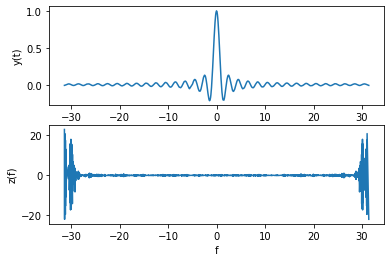

In [35]:
fig, axs = plt.subplots(2)
axs[0].plot(t,y)
axs[0].set_xlabel('t')
axs[0].set_ylabel('y(t)')
axs[1].set_xlabel('f')
axs[1].set_ylabel('z(f)')
axs[1].plot(t,z.real)

### save figure

In [188]:
fig.savefig("figure.png", dpi=300)